In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/BIKES/bike_data.csv')

In [4]:
len(df)/2

8689.5

In [5]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [7]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'], format='ISO8601')

In [9]:
from tensorflow import signal

([<matplotlib.axis.XTick at 0x1d2654b7be0>,
 [Text(1.0, 0, '1/year'),
  Text(52.0, 0, '1/week'),
  Text(362.0, 0, '1/day'),
  Text(724.1666666666666, 0, '1/10 hour')])

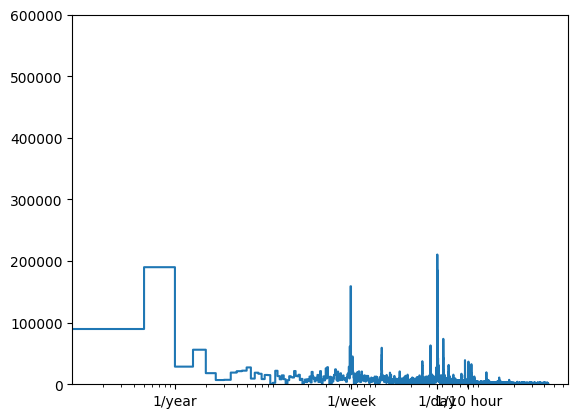

In [10]:
fft = signal.rfft(df['casual'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['casual'])
hours_per_year = 8690
years_per_dataset = 2

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 600000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 52, 362, 8690/12], labels=['1/year', '1/week', '1/day', '1/10 hour'])

In [11]:
362 / 7

51.714285714285715

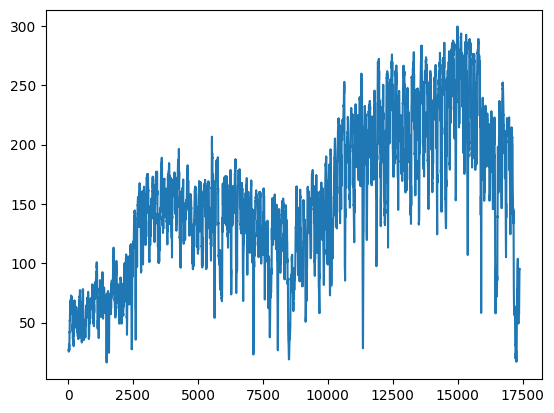

In [12]:
plt.plot(df['registered'].rolling(24).mean())

In [13]:
df['Day sin'] = np.sin(df['hr'] * (2 * np.pi / 24))
df['Day cos'] = np.cos(df['hr'] * (2 * np.pi / 24))

df['Week sin'] = np.sin((df['weekday'])  * (2 * np.pi / 7))
df['Week cos'] = np.cos((df['weekday'])  * (2 * np.pi / 7))

df['Year sin'] = np.sin((df['mnth'])  * (2 * np.pi / 12))
df['Year cos'] = np.cos((df['mnth'])  * (2 * np.pi / 12))

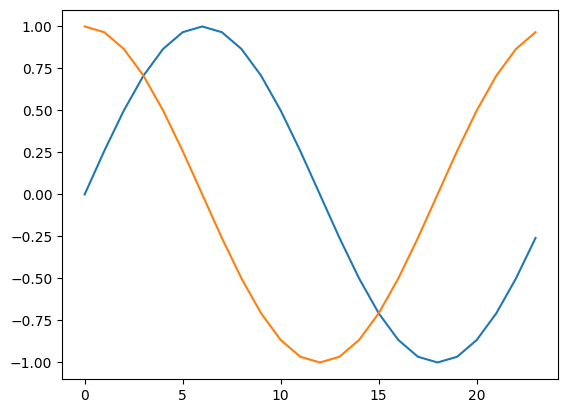

In [14]:
plt.plot(df['Day sin'].iloc[:24])
plt.plot(df['Day cos'].iloc[:24])

In [19]:
df_train = df.drop(['season', 'mnth', 'weekday', 'dteday', 'hr', 'weathersit', 'instant'], axis=1)


In [20]:
df_train[['weather_1', 'weather_2', 'weather_3', 'weather_4']] = pd.get_dummies(df['weathersit'])

In [21]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Day sin,Day cos,Week sin,Week cos,Year sin,Year cos,weather_1,weather_2,weather_3,weather_4
0,0,0,0,0.24,0.2879,0.81,0.0000,3,13,16,0.000000,1.000000,-0.781831,0.62349,5.000000e-01,0.866025,True,False,False,False
1,0,0,0,0.22,0.2727,0.80,0.0000,8,32,40,0.258819,0.965926,-0.781831,0.62349,5.000000e-01,0.866025,True,False,False,False
2,0,0,0,0.22,0.2727,0.80,0.0000,5,27,32,0.500000,0.866025,-0.781831,0.62349,5.000000e-01,0.866025,True,False,False,False
3,0,0,0,0.24,0.2879,0.75,0.0000,3,10,13,0.707107,0.707107,-0.781831,0.62349,5.000000e-01,0.866025,True,False,False,False
4,0,0,0,0.24,0.2879,0.75,0.0000,0,1,1,0.866025,0.500000,-0.781831,0.62349,5.000000e-01,0.866025,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,11,108,119,-0.965926,0.258819,0.781831,0.62349,-2.449294e-16,1.000000,False,True,False,False
17375,1,0,1,0.26,0.2576,0.60,0.1642,8,81,89,-0.866025,0.500000,0.781831,0.62349,-2.449294e-16,1.000000,False,True,False,False
17376,1,0,1,0.26,0.2576,0.60,0.1642,7,83,90,-0.707107,0.707107,0.781831,0.62349,-2.449294e-16,1.000000,True,False,False,False
17377,1,0,1,0.26,0.2727,0.56,0.1343,13,48,61,-0.500000,0.866025,0.781831,0.62349,-2.449294e-16,1.000000,True,False,False,False


In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [29]:
X = torch.Tensor(np.array(df_train.drop(['casual', 'registered', 'cnt'], axis=1)).astype('float64'))
y = torch.Tensor(np.array(df_train[['casual', 'registered', 'cnt']]).astype('float64'))



In [35]:
model = nn.Sequential(
    nn.Linear(17, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 3),
    nn.Sigmoid()
)

In [33]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

c:\Users\Viktor\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
num_epochs = 100


for n in range(num_epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()